In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../dados/instagram/filtered_comments.csv')

In [8]:
df_grouped = df.groupby('id_do_usuario').count()[['id_comment']]\
                                        .reset_index()\
                                        .rename(columns = {'id_comment': 'comentarios'})
stats_df = df_grouped.groupby('comentarios').count()\
                                            .reset_index()\
                                            .rename(columns = {'id_do_usuario': 'frequencia'})
stats_df['pdf'] = stats_df['frequencia'] / sum(stats_df['frequencia'])
stats_df['cdf'] = stats_df['pdf'].cumsum()

In [9]:
stats_df

,comentarios,frequencia,pdf,cdf
0,1,22603,0.733150,0.733150
1,2,4286,0.139020,0.872170
2,3,1443,0.046805,0.918975
3,4,721,0.023386,0.942361
4,5,394,0.012780,0.955141
...,...,...,...,...
95,189,1,0.000032,0.999870
96,199,1,0.000032,0.999903
97,313,1,0.000032,0.999935
98,372,1,0.000032,0.999968


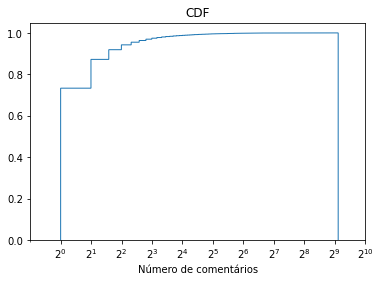

In [10]:
plt.hist(df_grouped['comentarios'], bins=df_grouped['comentarios'].max()+1, 
         density=True, cumulative=True, histtype='step')
plt.xlim(0, df_grouped['comentarios'].max())
plt.xscale('symlog', basex=2)
plt.xticks([2**i for i in range(0,11)])
plt.xlabel('Número de comentários')
plt.title('CDF')
plt.show()

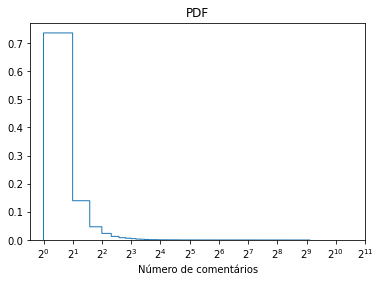

In [11]:
plt.hist(df_grouped['comentarios'], bins=df_grouped['comentarios'].max()+1, density=True, histtype='step')
plt.xscale('symlog', basex=2)
plt.xticks([2**i for i in range(0,12)])
plt.xlabel('Número de comentários')
plt.title('PDF')
plt.show()